## Import

In [1]:
#################################
# # when running google colab # #
#################################
# from google.colab import drive
# drive.mount('/content/gdrive')
# !pip install scikeras --quiet

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from keras.utils.np_utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, \
    BatchNormalization, Flatten, LSTM
# from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_curve, auc

from itertools import cycle
from scipy import interp
from scipy.optimize import brentq
from scipy.interpolate import interp1d

N_FEATURES = 31
TIMESTEPS = 1
DATASET_LINK = "dataset/overall.csv"
TEST_DATA_LINK = "dataset/overall_test.csv"

# random seed for reproducibility
SEED = 123

### LOAD MODEL

In [3]:
# ##################
# # # load model # #
# ##################

# model = create_model()
model = load_model("model/key_classifier.h5")

# ###########################
# # # load model in colab # #
# ###########################

# # model.model = load_model("/content/gdrive/My Drive/Colab Notebooks/overall_key_classifier.h5")

### LIVE TESTING
> * import any new data to perform testing and prediction

In [4]:
# import unseen data
pred_df = pd.read_csv(TEST_DATA_LINK)
pred_df.head()

subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t       H.t  \
0    Andy             1    1  0.174239     0.409866     0.235627  0.133840   
1    Andy             1    2  0.145289     0.154851     0.009562  0.131217   
2    Andy             1    3  0.122266     0.136321     0.014055  0.114905   
3    Andy             1    4  0.121075     0.132562     0.011487  0.134813   
4    Andy             1    5  0.141361     0.124721    -0.016640  0.098268   

     DD.t.i    UD.t.i       H.i  ...       H.a    DD.a.n    UD.a.n       H.n  \
0  0.171659  0.037820  0.156984  ...  0.137544  0.091721 -0.045824  0.099726   
1  0.129134 -0.002083  0.130980  ...  0.164865  0.111584 -0.053281  0.101935   
2  0.125308  0.010402  0.144332  ...  0.145501  0.095982 -0.049520  0.121049   
3  0.132049 -0.002763  0.135681  ...  0.135072  0.089715 -0.045356  0.117885   
4  0.149003  0.050735  0.128713  ...  0.121480  0.078897 -0.042583  0.108607   

     DD.n.l    UD.n.l       H.l  DD.l.Return  UD.l.Return  H.Return  
0  0.099142 -0.000585  0.120912     0.135934     0.015022  0.163508  
1  0.023678 -0.078258  0.140863     0.192325     0.051462  0.156958  
2  0.091486 -0.029563  0.111422     0.145751     0.034329  0.169304  
3  0.089209 -0.028676  0.098095     0.139069     0.040974  0.168298  
4  0.049435 -0.059172  0.131348     0.156398     0.025050  0.170112  

[5 rows x 34 columns]

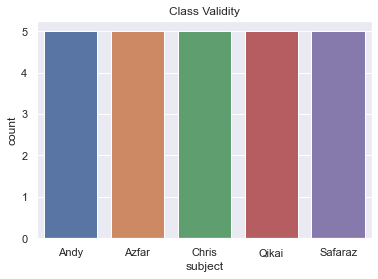

In [5]:
################################
# # check for class validity # #
################################
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="subject", data=pred_df).set_title("Class Validity")

# remove missing values if available
pred_df = pred_df.dropna()

In [12]:
pred_dataset = pred_df.values

# divide data into features X
# pred_row = pred_dataset[:,3:].astype(float)

#################################
# # predict more than one row # #
#################################

pred_row=pred_df.iloc[:,3:]

# pred_row = pred_dataset[:,3:].astype(float)

############################
# # predict a single row # #
############################

# pred_row=pred_df.iloc[0:2,3:]

################################
# # normalise and shape data # #
################################
pred_arr = pred_row.values.tolist()
# pred_row = scaler.transform(pred_row)
pred_arr = np.asarray(pred_arr, dtype=np.float32)
pred_arr = np.reshape(pred_arr, (pred_arr.shape[0], TIMESTEPS, pred_arr.shape[1]))

Y = ['Andy', 'Azfar', 'Chris', 'Qikai', 'Safaraz']
Y = np.asarray(Y)
Y = Y.reshape(-1, 1)
encoder = OneHotEncoder().fit(Y)

[['Andy']
 ['Azfar']
 ['Chris']
 ['Qikai']
 ['Safaraz']]


In [17]:
####################################
# # get prediction and its label # #
####################################
pred = model.predict(pred_arr)
pred = to_categorical(pred)
pred = encoder.inverse_transform(pred)
pred = np.ravel(pred)

pred_proba = model.predict_proba(pred_arr)
acc = np.max(pred_proba, axis=1)

pred_results = np.column_stack((pred, acc))

df = pd.DataFrame(data=pred_results, index=None, columns=['Prediction', 'Accuracy'])
print(df)

ValueError: Found array with dim 3. Estimator expected <= 2.